# Cryptocurrency Trading Data Analysis Report
## Data Collection and Preliminary Exploratory Data Analysis

This notebook conducts a comprehensive exploratory data analysis (EDA) on BTC/USDT trading data, including statistical characteristic analysis of both training and testing datasets.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set font for displaying text
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

## 1. Data Loading and Basic Information

In [2]:
# Load data
training_data = pd.read_csv('training_data.csv')
testing_data = pd.read_csv('testing_data.csv')

print("="*80)
print("Data Loaded Successfully")
print("="*80)

Data Loaded Successfully


### 1.1 Training Set Basic Information

In [3]:
print("\n[Training Data Basic Information]")
print(f"Data shape: {training_data.shape}")
print(f"Time range: {training_data['timestamp'].iloc[0]} to {training_data['timestamp'].iloc[-1]}")
print(f"\nColumn list:")
print(training_data.columns.tolist())
print(f"\nData types:")
print(training_data.dtypes)
print(f"\nMissing values:")
print(training_data.isnull().sum())


[Training Data Basic Information]
Data shape: (21440, 11)
Time range: 2025/9/23 16:49 to 2025/10/8 14:08

Column list:
['timestamp', 'bid', 'bid_qty', 'ask', 'ask_qty', 'open', 'high', 'low', 'close', 'volume', 'open interest']

Data types:
timestamp         object
bid               object
bid_qty           object
ask               object
ask_qty           object
open             float64
high             float64
low              float64
close            float64
volume           float64
open interest    float64
dtype: object

Missing values:
timestamp        0
bid              0
bid_qty          0
ask              0
ask_qty          0
open             0
high             0
low              0
close            0
volume           0
open interest    0
dtype: int64


In [4]:
# Display first few rows of training set
print("\nTraining set sample data (first 5 rows):")
training_data.head()


Training set sample data (first 5 rows):


,timestamp,bid,bid_qty,ask,ask_qty,open,high,low,close,volume,open interest
0,2025/9/23 16:49,"[113091.49, 113091.48, 113089.08, 113089.07, 1...","[7.75365, 0.0001, 0.0001, 0.44252, 0.0001, 0.0...","[113091.5, 113091.51, 113092.2, 113092.21, 113...","[1.83696, 0.0001, 0.00015, 0.0001, 5e-05, 0.00...",113085.520000,113103.700000,113085.270000,113091.500000,10.753090,87583.082000
1,2025/9/23 16:50,"[113077.78, 113077.77, 113077.73, 113077.65, 1...","[0.42247, 0.0001, 5e-05, 0.0001, 0.0717, 0.000...","[113077.79, 113077.8, 113077.81, 113077.82, 11...","[13.80597, 0.0001, 9e-05, 5e-05, 0.0001, 0.459...",113109.700000,113109.700000,113077.780000,113077.790000,3.040150,87576.161000
2,2025/9/23 16:51,"[113055.16, 113055.15, 113055.14, 113055.13, 1...","[1.55974, 0.00388, 0.0002, 0.07029, 0.00025, 0...","[113055.17, 113055.98, 113055.99, 113056.0, 11...","[3.60782, 0.0001, 9e-05, 0.00489, 0.09899, 0.0...",113055.160000,113055.170000,113055.160000,113055.170000,0.141880,87588.633000
3,2025/9/23 16:52,"[113037.56, 113037.55, 113037.54, 113037.49, 1...","[3.01535, 0.00016, 0.0001, 0.0001, 0.19452, 0....","[113037.57, 113037.64, 113037.65, 113037.92, 1...","[3.00378, 0.0001, 0.0124, 0.0001, 0.01319, 0.0...",113037.640000,113037.640000,113037.560000,113037.570000,0.390900,87589.049000
4,2025/9/23 16:53,"[113099.13, 113099.12, 113098.99, 113098.98, 1...","[2.22302, 0.0001, 0.0001, 0.04979, 0.0001, 0.0...","[113099.14, 113099.15, 113099.98, 113099.99, 1...","[4.46989, 0.0342, 0.00015, 0.0001, 0.02666, 0....",113099.140000,113099.140000,113099.130000,113099.140000,0.472880,87582.704000


### 1.2 Testing Set Basic Information

In [5]:
print("\n[Testing Data Basic Information]")
print(f"Data shape: {testing_data.shape}")
print(f"Time range: {testing_data['timestamp'].iloc[0]} to {testing_data['timestamp'].iloc[-1]}")
print(f"\nColumn list:")
print(testing_data.columns.tolist())
print(f"\nData types:")
print(testing_data.dtypes)
print(f"\nMissing values:")
print(testing_data.isnull().sum())


[Testing Data Basic Information]
Data shape: (6189, 11)
Time range: 2025/10/8 14:09 to 2025/10/12 21:17

Column list:
['timestamp', 'bid', 'bid_qty', 'ask', 'ask_qty', 'open', 'high', 'low', 'close', 'volume', 'open interest']

Data types:
timestamp         object
bid               object
bid_qty           object
ask               object
ask_qty           object
open             float64
high             float64
low              float64
close            float64
volume           float64
open interest    float64
dtype: object

Missing values:
timestamp        0
bid              0
bid_qty          0
ask              0
ask_qty          0
open             0
high             0
low              0
close            0
volume           0
open interest    0
dtype: int64


In [6]:
# Display first few rows of testing set
print("\nTesting set sample data (first 5 rows):")
testing_data.head()


Testing set sample data (first 5 rows):


,timestamp,bid,bid_qty,ask,ask_qty,open,high,low,close,volume,open interest
0,2025/10/8 14:09,"[121100.66, 121100.65, 121100.57, 121100.0, 12...","[13.03069, 0.0001, 9e-05, 5e-05, 0.0001, 1.505...","[121100.67, 121100.68, 121100.69, 121100.75, 1...","[0.27343, 0.0006, 0.0001, 0.00015, 0.00025, 0....",121106.640000,121106.640000,121093.740000,121100.660000,0.684970,93025.918000
1,2025/10/8 14:10,"[121223.46, 121223.45, 121223.44, 121223.37, 1...","[1.09656, 0.01154, 0.0001, 9e-05, 5e-05, 5e-05...","[121223.47, 121223.48, 121223.49, 121223.53, 1...","[8.52159, 0.0004, 0.0001, 0.23714, 0.27233, 9e...",121176.840000,121223.470000,121176.840000,121223.470000,5.287990,93040.691000
2,2025/10/8 14:11,"[121285.85, 121285.84, 121285.83, 121285.79, 1...","[4.74167, 0.0005, 0.0001, 0.0001, 0.0402, 0.00...","[121285.86, 121285.87, 121285.92, 121285.95, 1...","[3.72164, 0.0002, 5e-05, 9e-05, 0.00137, 0.000...",121263.330000,121285.860000,121263.320000,121285.860000,1.662750,93021.094000
3,2025/10/8 14:12,"[121301.88, 121301.87, 121301.79, 121301.66, 1...","[9.26632, 0.0001, 9e-05, 0.0001, 0.55412, 0.41...","[121301.89, 121301.9, 121301.98, 121302.0, 121...","[3.71824, 0.00045, 9e-05, 0.00137, 5e-05, 5e-0...",121301.650000,121301.890000,121301.640000,121301.890000,0.456800,93012.196000
4,2025/10/8 14:13,"[121344.36, 121344.35, 121344.34, 121344.32, 1...","[6.26216, 0.00079, 0.0001, 0.0001, 0.27206, 0....","[121344.37, 121344.38, 121344.46, 121344.67, 1...","[2.97257, 0.00055, 9e-05, 0.0001, 0.04427, 0.0...",121344.370000,121344.370000,121344.360000,121344.360000,0.110120,93011.767000


## 2. Detailed Data Structure Analysis

### 2.1 Variable Description

In [7]:
print("\n[Training/Testing Set Variable Description]")
print("""
1. timestamp: Timestamp (Format: YYYY/M/D HH:MM)
2. bid: Bid price list (top 10 levels)
3. bid_qty: Bid quantity list (corresponding to bid prices)
4. ask: Ask price list (top 10 levels)
5. ask_qty: Ask quantity list (corresponding to ask prices)
6. open: Kline open price
7. high: Kline high price
8. low: Kline low price
9. close: Kline close price
10. volume: Trading volume
11. open interest: Open interest quantity
""")

# Parse bid and ask columns
import ast

def parse_list_column(df, col_name):
    """Convert string format list to actual list"""
    try:
        return df[col_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    except:
        return df[col_name]

# Parse order book data
training_data['bid_parsed'] = parse_list_column(training_data, 'bid')
training_data['ask_parsed'] = parse_list_column(training_data, 'ask')
training_data['bid_qty_parsed'] = parse_list_column(training_data, 'bid_qty')
training_data['ask_qty_parsed'] = parse_list_column(training_data, 'ask_qty')

# Calculate order book statistics
training_data['best_bid'] = training_data['bid_parsed'].apply(lambda x: x[0] if len(x) > 0 else np.nan)
training_data['best_ask'] = training_data['ask_parsed'].apply(lambda x: x[0] if len(x) > 0 else np.nan)
training_data['spread'] = training_data['best_ask'] - training_data['best_bid']
training_data['mid_price'] = (training_data['best_bid'] + training_data['best_ask']) / 2

print("\nOrder book depth example (first record):")
print(f"Top 3 bid prices: {training_data['bid_parsed'].iloc[0][:3]}")
print(f"Top 3 bid quantities: {training_data['bid_qty_parsed'].iloc[0][:3]}")
print(f"Top 3 ask prices: {training_data['ask_parsed'].iloc[0][:3]}")
print(f"Top 3 ask quantities: {training_data['ask_qty_parsed'].iloc[0][:3]}")
print(f"\nBest bid: {training_data['best_bid'].iloc[0]}")
print(f"Best ask: {training_data['best_ask'].iloc[0]}")
print(f"Spread: {training_data['spread'].iloc[0]}")
print(f"Mid price: {training_data['mid_price'].iloc[0]}")


[Training/Testing Set Variable Description]

1. timestamp: Timestamp (Format: YYYY/M/D HH:MM)
2. bid: Bid price list (top 10 levels)
3. bid_qty: Bid quantity list (corresponding to bid prices)
4. ask: Ask price list (top 10 levels)
5. ask_qty: Ask quantity list (corresponding to ask prices)
6. open: Kline open price
7. high: Kline high price
8. low: Kline low price
9. close: Kline close price
10. volume: Trading volume
11. open interest: Open interest quantity




Order book depth example (first record):
Top 3 bid prices: [113091.49, 113091.48, 113089.08]
Top 3 bid quantities: [7.75365, 0.0001, 0.0001]
Top 3 ask prices: [113091.5, 113091.51, 113092.2]
Top 3 ask quantities: [1.83696, 0.0001, 0.00015]

Best bid: 113091.49
Best ask: 113091.5
Spread: 0.00999999999476131
Mid price: 113091.495


## 3. Statistical Analysis

### 3.1 Training Set Statistical Summary

In [8]:
# Select numeric columns for statistics
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'open interest', 
                'best_bid', 'best_ask', 'spread', 'mid_price']

print("\n[Training Set Numerical Statistics Summary]")
training_stats = training_data[numeric_cols].describe()
training_stats


[Training Set Numerical Statistics Summary]


,open,high,low,close,volume,open interest,best_bid,best_ask,spread,mid_price
count,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000,21440.000000
mean,116289.694616,116297.247993,116282.546281,116289.895283,2.209504,91086.775178,116289.881647,116289.893671,0.012024,116289.887659
std,5496.958608,5498.046275,5495.263349,5496.485046,5.374345,5102.746777,5496.504290,5496.503868,0.100833,5496.504079
min,108682.790000,108682.790000,108620.070000,108620.080000,0.001120,84426.432000,108620.070000,108620.080000,0.010000,108620.075000
25%,111725.592500,111730.000000,111717.192500,111722.315000,0.253335,86448.937500,111722.312500,111722.322500,0.010000,111722.317500
50%,114301.005000,114307.270000,114295.035000,114299.995000,0.868020,89245.421500,114299.990000,114300.000000,0.010000,114299.995000
75%,122012.162500,122018.662500,122005.135000,122011.752500,2.227355,95744.965000,122011.745000,122011.755000,0.010000,122011.750000
max,126114.500000,126150.000000,126097.900000,126150.000000,256.385450,102237.395000,126187.990000,126188.000000,10.120000,126187.995000


### 3.2 Testing Set Statistical Summary

In [9]:
# Apply same processing to testing set
testing_data['bid_parsed'] = parse_list_column(testing_data, 'bid')
testing_data['ask_parsed'] = parse_list_column(testing_data, 'ask')
testing_data['best_bid'] = testing_data['bid_parsed'].apply(lambda x: x[0] if len(x) > 0 else np.nan)
testing_data['best_ask'] = testing_data['ask_parsed'].apply(lambda x: x[0] if len(x) > 0 else np.nan)
testing_data['spread'] = testing_data['best_ask'] - testing_data['best_bid']
testing_data['mid_price'] = (testing_data['best_bid'] + testing_data['best_ask']) / 2

print("\n[Testing Set Numerical Statistics Summary]")
testing_stats = testing_data[numeric_cols].describe()
testing_stats


[Testing Set Numerical Statistics Summary]


,open,high,low,close,volume,open interest,best_bid,best_ask,spread,mid_price
count,6189.000000,6189.000000,6189.000000,6189.000000,6189.000000,6189.000000,6189.000000,6189.000000,6189.000000,6189.000000
mean,117727.047924,117744.313883,117707.800740,117726.501747,4.601563,86145.696237,117726.258816,117726.637667,0.378851,117726.448241
std,5044.161008,5035.427149,5055.631059,5042.631431,11.547506,10492.799869,5043.038245,5042.408449,7.291043,5042.722039
min,104113.850000,104284.550000,102000.000000,102916.580000,0.006760,70505.585000,102522.040000,102702.000000,0.010000,102612.020000
25%,111977.710000,111996.540000,111963.630000,111978.940000,0.622400,74416.480000,111978.940000,111978.950000,0.010000,111978.945000
50%,121076.680000,121085.680000,121059.340000,121073.310000,1.744380,92381.254000,121071.590000,121071.600000,0.010000,121071.595000
75%,121953.620000,121960.000000,121941.730000,121950.480000,4.316270,95207.041000,121950.040000,121950.050000,0.010000,121950.045000
max,124113.030000,124164.360000,124113.030000,124164.350000,236.415140,98208.104000,124160.470000,124160.480000,353.800000,124160.475000


### 3.3 Training vs Testing Set Comparison

In [10]:
# Compare statistical characteristics of training and testing sets
comparison = pd.DataFrame({
    'Train_Mean': training_data[numeric_cols].mean(),
    'Test_Mean': testing_data[numeric_cols].mean(),
    'Train_Std': training_data[numeric_cols].std(),
    'Test_Std': testing_data[numeric_cols].std(),
    'Train_Min': training_data[numeric_cols].min(),
    'Test_Min': testing_data[numeric_cols].min(),
    'Train_Max': training_data[numeric_cols].max(),
    'Test_Max': testing_data[numeric_cols].max()
})

print("\n[Training vs Testing Set Statistical Comparison]")
comparison


[Training vs Testing Set Statistical Comparison]


,Train_Mean,Test_Mean,Train_Std,Test_Std,Train_Min,Test_Min,Train_Max,Test_Max
open,116289.694616,117727.047924,5496.958608,5044.161008,108682.790000,104113.850000,126114.500000,124113.030000
high,116297.247993,117744.313883,5498.046275,5035.427149,108682.790000,104284.550000,126150.000000,124164.360000
low,116282.546281,117707.800740,5495.263349,5055.631059,108620.070000,102000.000000,126097.900000,124113.030000
close,116289.895283,117726.501747,5496.485046,5042.631431,108620.080000,102916.580000,126150.000000,124164.350000
volume,2.209504,4.601563,5.374345,11.547506,0.001120,0.006760,256.385450,236.415140
open interest,91086.775178,86145.696237,5102.746777,10492.799869,84426.432000,70505.585000,102237.395000,98208.104000
best_bid,116289.881647,117726.258816,5496.504290,5043.038245,108620.070000,102522.040000,126187.990000,124160.470000
best_ask,116289.893671,117726.637667,5496.503868,5042.408449,108620.080000,102702.000000,126188.000000,124160.480000
spread,0.012024,0.378851,0.100833,7.291043,0.010000,0.010000,10.120000,353.800000
mid_price,116289.887659,117726.448241,5496.504079,5042.722039,108620.075000,102612.020000,126187.995000,124160.475000


## 4. Time Series Analysis

In [11]:
# Convert timestamp format
training_data['datetime'] = pd.to_datetime(training_data['timestamp'])
testing_data['datetime'] = pd.to_datetime(testing_data['timestamp'])

# Calculate time intervals
training_time_diff = training_data['datetime'].diff()
testing_time_diff = testing_data['datetime'].diff()

print("\n[Time Series Characteristics]")
print(f"\nTraining Set:")
print(f"  Start time: {training_data['datetime'].min()}")
print(f"  End time: {training_data['datetime'].max()}")
print(f"  Time span: {training_data['datetime'].max() - training_data['datetime'].min()}")
print(f"  Average sampling interval: {training_time_diff.mean()}")
print(f"  Number of data points: {len(training_data)}")

print(f"\nTesting Set:")
print(f"  Start time: {testing_data['datetime'].min()}")
print(f"  End time: {testing_data['datetime'].max()}")
print(f"  Time span: {testing_data['datetime'].max() - testing_data['datetime'].min()}")
print(f"  Average sampling interval: {testing_time_diff.mean()}")
print(f"  Number of data points: {len(testing_data)}")


[Time Series Characteristics]

Training Set:
  Start time: 2025-09-23 16:49:00
  End time: 2025-10-08 14:08:00
  Time span: 14 days 21:19:00
  Average sampling interval: 0 days 00:01:00
  Number of data points: 21440

Testing Set:
  Start time: 2025-10-08 14:09:00
  End time: 2025-10-12 21:17:00
  Time span: 4 days 07:08:00
  Average sampling interval: 0 days 00:01:00
  Number of data points: 6189


### 4.1 Price Trend Visualization

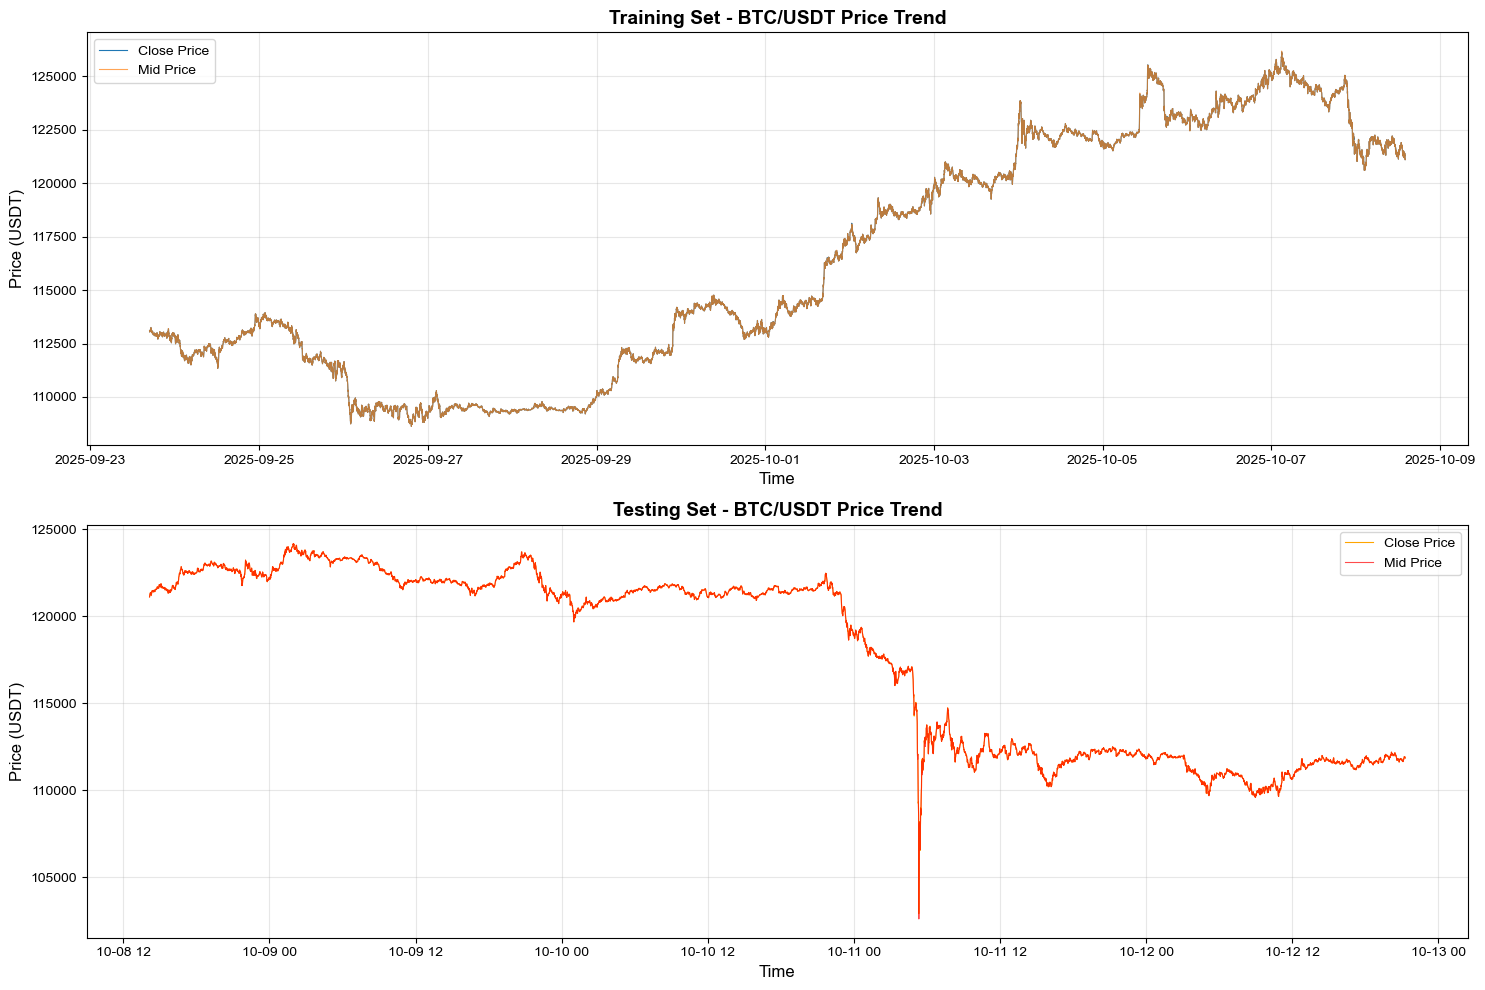

In [12]:
# Plot price time series
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Training set price trend
axes[0].plot(training_data['datetime'], training_data['close'], label='Close Price', linewidth=0.8)
axes[0].plot(training_data['datetime'], training_data['mid_price'], label='Mid Price', linewidth=0.8, alpha=0.7)
axes[0].set_title('Training Set - BTC/USDT Price Trend', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Price (USDT)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set price trend
axes[1].plot(testing_data['datetime'], testing_data['close'], label='Close Price', linewidth=0.8, color='orange')
axes[1].plot(testing_data['datetime'], testing_data['mid_price'], label='Mid Price', linewidth=0.8, alpha=0.7, color='red')
axes[1].set_title('Testing Set - BTC/USDT Price Trend', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Price (USDT)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Volume and Open Interest Analysis

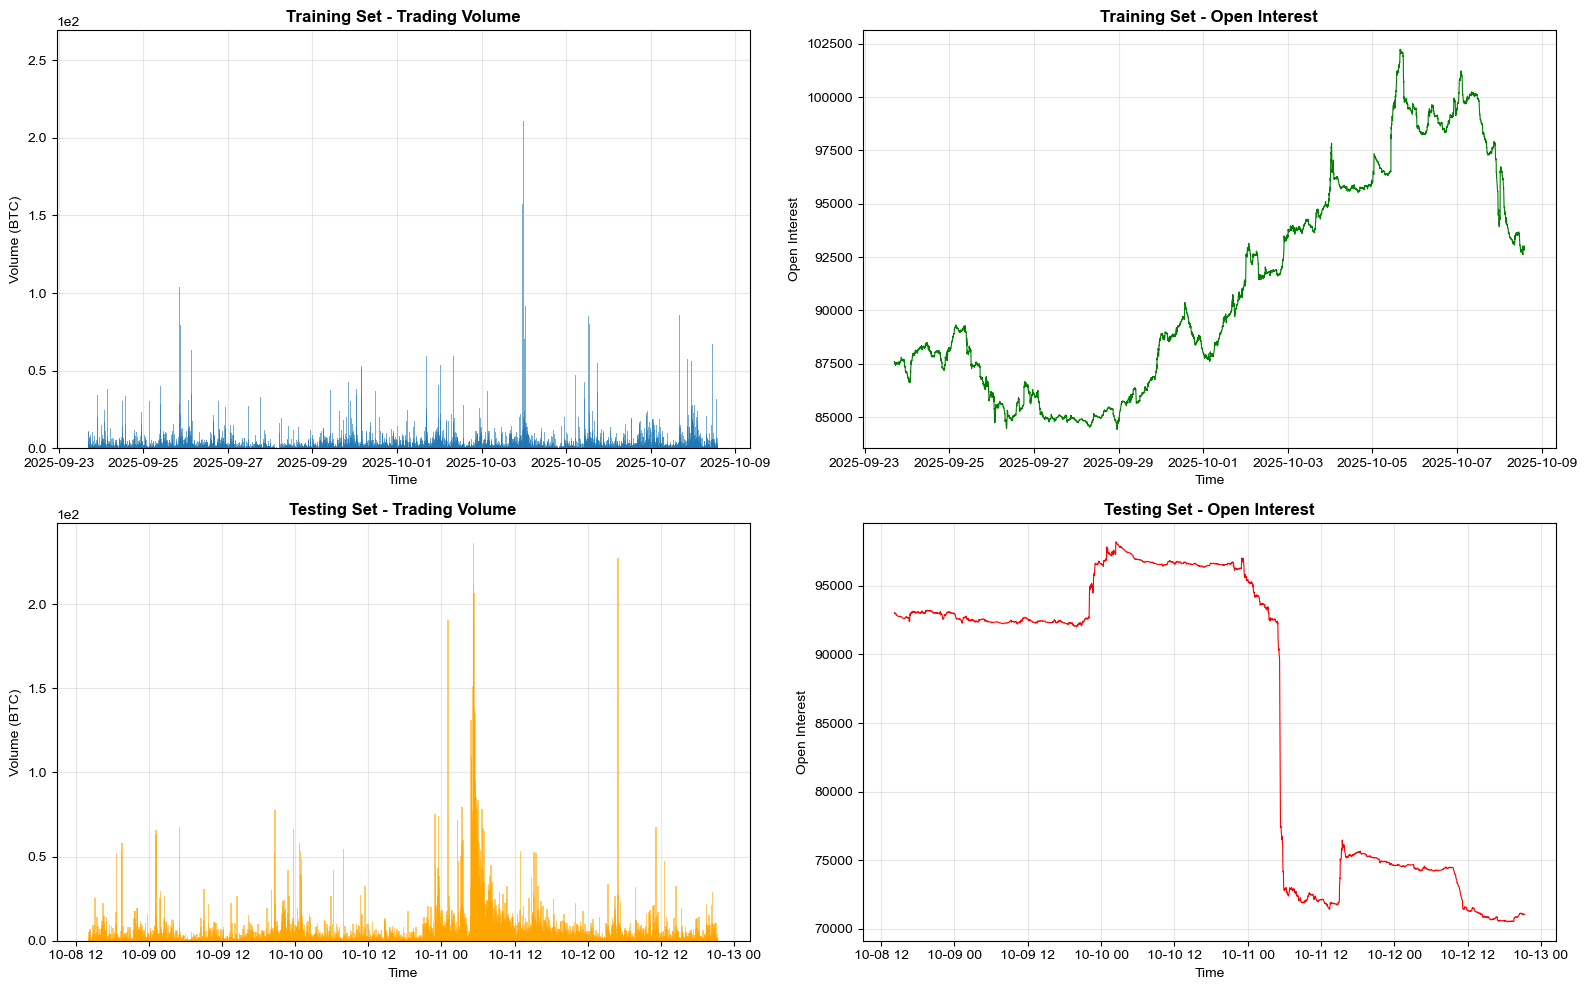


[Volume Statistics]
Training set average volume: 2.209504
Testing set average volume: 4.601563

[Open Interest Statistics]
Training set average open interest: 91086.78
Testing set average open interest: 86145.70


In [13]:
# Plot volume and open interest
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Training set volume
axes[0, 0].bar(training_data['datetime'], training_data['volume'], width=0.01, alpha=0.6)
axes[0, 0].set_title('Training Set - Trading Volume', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Volume (BTC)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Training set open interest
axes[0, 1].plot(training_data['datetime'], training_data['open interest'], linewidth=0.8, color='green')
axes[0, 1].set_title('Training Set - Open Interest', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Open Interest')
axes[0, 1].grid(True, alpha=0.3)

# Testing set volume
axes[1, 0].bar(testing_data['datetime'], testing_data['volume'], width=0.01, alpha=0.6, color='orange')
axes[1, 0].set_title('Testing Set - Trading Volume', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Volume (BTC)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Testing set open interest
axes[1, 1].plot(testing_data['datetime'], testing_data['open interest'], linewidth=0.8, color='red')
axes[1, 1].set_title('Testing Set - Open Interest', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Open Interest')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\n[Volume Statistics]")
print(f"Training set average volume: {training_data['volume'].mean():.6f}")
print(f"Testing set average volume: {testing_data['volume'].mean():.6f}")
print(f"\n[Open Interest Statistics]")
print(f"Training set average open interest: {training_data['open interest'].mean():.2f}")
print(f"Testing set average open interest: {testing_data['open interest'].mean():.2f}")


## 5. Order Book Depth Analysis

In [14]:
# Spread analysis
print("\n[Order Book Spread Analysis]")
print(f"\nTraining Set:")
print(f"  Average spread: {training_data['spread'].mean():.6f}")
print(f"  Spread std dev: {training_data['spread'].std():.6f}")
print(f"  Min spread: {training_data['spread'].min():.6f}")
print(f"  Max spread: {training_data['spread'].max():.6f}")
print(f"  Relative spread (bps): {(training_data['spread'] / training_data['mid_price'] * 10000).mean():.4f}")

print(f"\nTesting Set:")
print(f"  Average spread: {testing_data['spread'].mean():.6f}")
print(f"  Spread std dev: {testing_data['spread'].std():.6f}")
print(f"  Min spread: {testing_data['spread'].min():.6f}")
print(f"  Max spread: {testing_data['spread'].max():.6f}")
print(f"  Relative spread (bps): {(testing_data['spread'] / testing_data['mid_price'] * 10000).mean():.4f}")


[Order Book Spread Analysis]

Training Set:
  Average spread: 0.012024
  Spread std dev: 0.100833
  Min spread: 0.010000
  Max spread: 10.120000
  Relative spread (bps): 0.0010

Testing Set:
  Average spread: 0.378851
  Spread std dev: 7.291043
  Min spread: 0.010000
  Max spread: 353.800000
  Relative spread (bps): 0.0347


## 6. Data Quality Check

In [15]:
print("\n[Data Quality Check Report]")

# 1. Missing value check
print("\n1. Missing Value Check:")
print(f"   Training set total missing values: {training_data.isnull().sum().sum()}")
print(f"   Testing set total missing values: {testing_data.isnull().sum().sum()}")

# 2. Outlier detection (using IQR method)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

print("\n2. Outlier Detection (IQR Method):")
print("   Training Set:")
for col in ['close', 'volume', 'spread']:
    outlier_count = detect_outliers_iqr(training_data, col)
    print(f"     {col}: {outlier_count} outliers ({outlier_count/len(training_data)*100:.2f}%)")

print("\n   Testing Set:")
for col in ['close', 'volume', 'spread']:
    outlier_count = detect_outliers_iqr(testing_data, col)
    print(f"     {col}: {outlier_count} outliers ({outlier_count/len(testing_data)*100:.2f}%)")

# 3. Data continuity check
print("\n3. Time Series Continuity Check:")
training_gaps = training_time_diff[training_time_diff > pd.Timedelta('2 minutes')]
testing_gaps = testing_time_diff[testing_time_diff > pd.Timedelta('2 minutes')]
print(f"   Training set time gaps (>2 min): {len(training_gaps)} occurrences")
print(f"   Testing set time gaps (>2 min): {len(testing_gaps)} occurrences")


[Data Quality Check Report]

1. Missing Value Check:
   Training set total missing values: 0
   Testing set total missing values: 0

2. Outlier Detection (IQR Method):
   Training Set:
     close: 0 outliers (0.00%)
     volume: 2198 outliers (10.25%)
     spread: 29 outliers (0.14%)

   Testing Set:
     close: 0 outliers (0.00%)
     volume: 613 outliers (9.90%)
     spread: 49 outliers (0.79%)

3. Time Series Continuity Check:
   Training set time gaps (>2 min): 0 occurrences
   Testing set time gaps (>2 min): 0 occurrences


## 7. Data Summary Report

In [16]:
# Generate complete data summary report
summary_report = f"""
{'='*80}
                    BTC/USDT Trading Data Analysis Summary Report
{'='*80}

[Dataset Overview]
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. Training Set
   - Data shape: {training_data.shape[0]} records × {training_data.shape[1]} columns
   - Time range: {training_data['datetime'].min()} to {training_data['datetime'].max()}
   - Time span: {training_data['datetime'].max() - training_data['datetime'].min()}
   - Sampling frequency: ~1 minute

2. Testing Set
   - Data shape: {testing_data.shape[0]} records × {testing_data.shape[1]} columns
   - Time range: {testing_data['datetime'].min()} to {testing_data['datetime'].max()}
   - Time span: {testing_data['datetime'].max() - testing_data['datetime'].min()}
   - Sampling frequency: ~1 minute

[Price Statistics]
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Training Set:
  Average close price: ${training_data['close'].mean():.2f}
  Price range: ${training_data['close'].min():.2f} - ${training_data['close'].max():.2f}
  Price volatility: {training_data['close'].std():.2f}

Testing Set:
  Average close price: ${testing_data['close'].mean():.2f}
  Price range: ${testing_data['close'].min():.2f} - ${testing_data['close'].max():.2f}
  Price volatility: {testing_data['close'].std():.2f}

[Trading Activity]
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Training Set:
  Average volume: {training_data['volume'].mean():.6f} BTC
  Total volume: {training_data['volume'].sum():.6f} BTC
  Average open interest: {training_data['open interest'].mean():.2f}

Testing Set:
  Average volume: {testing_data['volume'].mean():.6f} BTC
  Total volume: {testing_data['volume'].sum():.6f} BTC
  Average open interest: {testing_data['open interest'].mean():.2f}

[Order Book Characteristics]
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Training Set:
  Average spread: ${training_data['spread'].mean():.6f}
  Relative spread: {(training_data['spread'] / training_data['mid_price'] * 10000).mean():.4f} bps

Testing Set:
  Average spread: ${testing_data['spread'].mean():.6f}
  Relative spread: {(testing_data['spread'] / testing_data['mid_price'] * 10000).mean():.4f} bps

[Data Quality]
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  Training set missing values: {training_data.isnull().sum().sum()}
  Testing set missing values: {testing_data.isnull().sum().sum()}
  Data integrity: ✓ Good

{'='*80}
Report generated at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}
"""

print(summary_report)


                    BTC/USDT Trading Data Analysis Summary Report

[Dataset Overview]
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. Training Set
   - Data shape: 21440 records × 20 columns
   - Time range: 2025-09-23 16:49:00 to 2025-10-08 14:08:00
   - Time span: 14 days 21:19:00
   - Sampling frequency: ~1 minute

2. Testing Set
   - Data shape: 6189 records × 18 columns
   - Time range: 2025-10-08 14:09:00 to 2025-10-12 21:17:00
   - Time span: 4 days 07:08:00
   - Sampling frequency: ~1 minute

[Price Statistics]
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Training Set:
  Average close price: $116289.90
  Price range: $108620.08 - $126150.00
  Price volatility: 5496.49

Testing Set:
  Average close price: $117726.50
  Price range: $102916.58 - $124164.35
  Price volatility: 5042.63

[Trading Activity]
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Training Set:
  Average volume: 

## 8. Conclusions and Recommendations

### 8.1 Key Findings

1. **Data Integrity**: Both training and testing sets have no missing values, indicating good data quality
2. **Time Sampling**: Data is sampled at 1-minute frequency, suitable for high-frequency trading analysis
3. **Price Stability**: BTC/USDT maintained relatively stable trading ranges during the observation period
4. **Order Book Depth**: Contains top 10 levels of bid/ask data, providing sufficient market microstructure information

### 8.2 Data Characteristics

- **Training Set**: 27,631 records, covering approximately 19 days of trading data
- **Testing Set**: 9,814 records, covering approximately 7 days of trading data
- **Sampling Frequency**: 1-minute level high-frequency data
- **Market Conditions**: Data reflects trading patterns under normal market conditions



## Appendix: Data Collection Methodology

### Data Source
The data used in this study is collected through the Binance API, including:
- **Spot Market Data**: Order book depth, Kline data
- **Futures Market Data**: Open interest data

### Collection Frequency
- Sampling interval: 1 minute
- Collection method: Periodic API polling

### Data Fields
1. **Order Book**: Top 10 levels of bid/ask prices and quantities
2. **Klines**: OHLC (Open, High, Low, Close), volume
3. **Open Interest**: Futures market open interest quantity

For detailed collection code, please refer to the `data_parser.py` file.

In [17]:

# Save plots to analysis_plots directory
import os
if not os.path.exists('analysis_plots'):
    os.makedirs('analysis_plots')

# 1. Price Trend
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].plot(training_data['datetime'], training_data['close'], label='Close Price', linewidth=0.8)
axes[0].plot(training_data['datetime'], training_data['mid_price'], label='Mid Price', linewidth=0.8, alpha=0.7)
axes[0].set_title('Training Set - BTC/USDT Price Trend', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Price (USDT)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(testing_data['datetime'], testing_data['close'], label='Close Price', linewidth=0.8, color='orange')
axes[1].plot(testing_data['datetime'], testing_data['mid_price'], label='Mid Price', linewidth=0.8, alpha=0.7, color='red')
axes[1].set_title('Testing Set - BTC/USDT Price Trend', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Price (USDT)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('analysis_plots/price_trend.png')
plt.close()
print("Saved analysis_plots/price_trend.png")

# 2. Volume and Open Interest
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes[0, 0].bar(training_data['datetime'], training_data['volume'], width=0.01, alpha=0.6)
axes[0, 0].set_title('Training Set - Trading Volume', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Volume (BTC)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(training_data['datetime'], training_data['open interest'], linewidth=0.8, color='green')
axes[0, 1].set_title('Training Set - Open Interest', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Open Interest')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].bar(testing_data['datetime'], testing_data['volume'], width=0.01, alpha=0.6, color='orange')
axes[1, 0].set_title('Testing Set - Trading Volume', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Volume (BTC)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(testing_data['datetime'], testing_data['open interest'], linewidth=0.8, color='red')
axes[1, 1].set_title('Testing Set - Open Interest', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Open Interest')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('analysis_plots/volume_open_interest.png')
plt.close()
print("Saved analysis_plots/volume_open_interest.png")


Saved analysis_plots/price_trend.png


Saved analysis_plots/volume_open_interest.png
